# Food Demand Forecasting for Food Delivery Company using IBM Cloud
Project Descreption

A food delivery service has to deal with a lot of perishable raw materials which makes it all, the most important factor for such a company is to accurately forecast daily and weekly demand. Too much inventory in the warehouse means more risk of wastage, and not enough could lead to out-of-stocks - and push customers to seek solutions from your competitors. The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance, the task is to predict the demand for the next 10 weeks.

The main aim of this project is to create an appropriate machine learning model to forecast then number of orders to gather raw materials for next ten weeks. To achieve this, we should know the information about of fulfilment center like area, city etc., and meal information like category of food sub category of food price of the food or discount in particular week. By using this data, we can use any classification algorithm to forecast the quantity for 10 weeks. A web application is built which is integrated with the model built.

# Data Pre-processing
Data Pre-processing includes the following main tasks

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

# Reading The Dataset

In [5]:
import os, types
import pandas as pd


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
#client_ebb884ca98d444a5ae59a6874ea685aa = ibm_boto3.client(service_name='s3',
    #ibm_api_key_id='wpDaZ8i25hBUjECeVfV6QjgJGUYRQNv4kV3iwmlavMNN',
    #ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    #config=Config(signature_version='oauth'),
    #endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

#body = client_ebb884ca98d444a5ae59a6874ea685aa.get_object(Bucket='fooddemandforecatsing-donotdelete-pr-cdss9tfwyg4lgb',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(r'C:\Users\Raj\Desktop\gate 2024\SBSPS-Challenge-8325-Food-Demand-Forecasting-for-Food-Delivery-Company-using-IBM-Cloud-main\Food-Demand-Forecasting\Dataset\train.csv')

In [6]:

#body = client_ebb884ca98d444a5ae59a6874ea685aa.get_object(Bucket='fooddemandforecatsing-donotdelete-pr-cdss9tfwyg4lgb',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(r"C:\Users\Raj\Desktop\gate 2024\SBSPS-Challenge-8325-Food-Demand-Forecasting-for-Food-Delivery-Company-using-IBM-Cloud-main\Food-Demand-Forecasting\Dataset\test.csv")

# Exploratory Data Analysis

In [7]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [11]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [12]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


# Checking for null values

In [13]:
train.isnull().any()

id                       False
week                     False
center_id                False
meal_id                  False
checkout_price           False
base_price               False
emailer_for_promotion    False
homepage_featured        False
num_orders               False
dtype: bool

In [14]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

# Reading And Merging .Csv Files

In [15]:

#body = client_ebb884ca98d444a5ae59a6874ea685aa.get_object(Bucket='fooddemandforecatsing-donotdelete-pr-cdss9tfwyg4lgb',Key='meal_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

meal_info = pd.read_csv(r"C:\Users\Raj\Desktop\gate 2024\SBSPS-Challenge-8325-Food-Demand-Forecasting-for-Food-Delivery-Company-using-IBM-Cloud-main\Food-Demand-Forecasting\Dataset\meal_info.csv")

In [16]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [17]:

#body = client_ebb884ca98d444a5ae59a6874ea685aa.get_object(Bucket='fooddemandforecatsing-donotdelete-pr-cdss9tfwyg4lgb',Key='fulfilment_center_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

fulfilment_center_info = pd.read_csv(r'C:\Users\Raj\Desktop\gate 2024\SBSPS-Challenge-8325-Food-Demand-Forecasting-for-Food-Delivery-Company-using-IBM-Cloud-main\Food-Demand-Forecasting\Dataset\fulfilment_center_info.csv')

In [18]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


Merging train.csv and meal_info.csv dataset by using common key id:

We notice that meal_id column in train.csv is similar to meal_id in meal_info.csv dataset. Let us merge these two datasets, train.csv and meal_info.csv using common key meal_id and name the table as trainfinal.

In [19]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")

Merging trainfinal.csv and fulfilment_center_info.csv dataset by using common key id:

We notice that center_id column in trainfinal.csv is similar to center_id in fulfilment_center_info.csv dataset. Let us merge these two datasets, trainfinal.csv and fulfilment_center_info.csv using common key center_id and store it back in trainfinal.Display the first five rows of trainfinal using head().

In [20]:
trainfinal = pd.merge(trainfinal,fulfilment_center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


# Dropping Columns

Let’s drop columns “center_id” and “meal_id” as they are not required for the further process. Display the changes of trainfinal table using head().

In [21]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Display the list of columns present in trainfinal table and store it in variable “cols”

In [22]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


Rearrange the columns by slicing the columns of “cols” and print “cols”

In [23]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


Store the changes of columns in trainfinal and display the datatypes of trainfinal using trainfinal.dtypes. Here, we can see that, we not only have numerical data but we also have object data.

In [24]:
trainfinal = trainfinal[cols]
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,TYPE_C,2.0,Beverages,Thai,136.83,152.29,0,0,177
1,1018704,2,647,56,TYPE_C,2.0,Beverages,Thai,135.83,152.29,0,0,323
2,1196273,3,647,56,TYPE_C,2.0,Beverages,Thai,132.92,133.92,0,0,96
3,1116527,4,647,56,TYPE_C,2.0,Beverages,Thai,135.86,134.86,0,0,163
4,1343872,5,647,56,TYPE_C,2.0,Beverages,Thai,146.50,147.50,0,0,215


In [25]:
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

# Label Encoding

Typically, any structured dataset includes multiple columns with combination of numerical as well as categorical variables. A machine can only understand the numbers. It cannot understand the text.That’s essentially the case with Machine Learning algorithms too.

We need to convert each text category to numbers in order for the machine to process those using mathematical equations.
Label Encoding is a popular encoding technique for handling categorical variables implemented using the scikit-learn library in python.In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [26]:
from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])
lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])
lb3 = LabelEncoder()
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In the above code we have selected text class categorical columns for performing label encoding.

In [27]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


After performing label encoding, alphabetical classes- “Center type, Category and City code are converted to numeric values.

Finally display number of rows and columns of trainfinal using shape()

In [28]:
trainfinal.shape

(456548, 13)

# Data Visualization

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'num_orders Distribution')

<Figure size 1200x700 with 0 Axes>

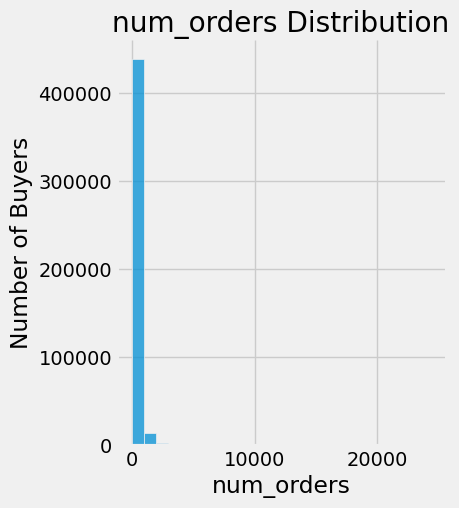

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.displot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

Drop the column “id” and find the correlation between the columns.

In [31]:
trainfinal2 = trainfinal.drop(['id'],axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

Correlation is a statistical relationship between two variables and it could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable's value increases, the other variables' values decrease.
With the help of seaborn heatmap we will be plotting the heatmap and for finding the correlation between variable we have corr() available.

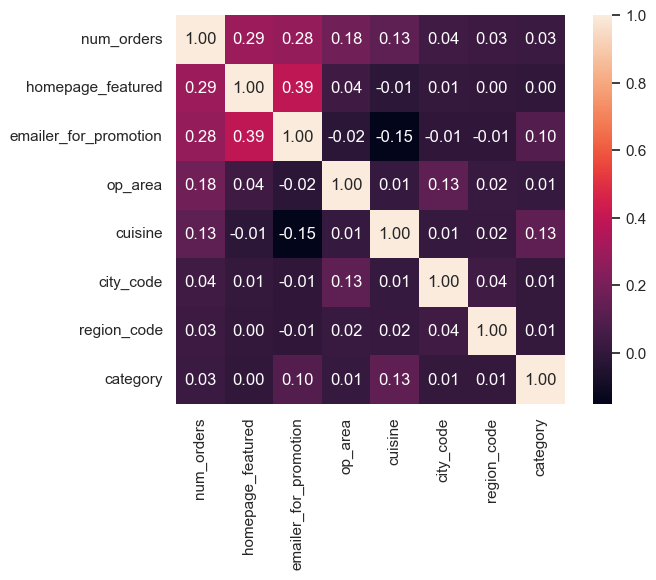

In [32]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f',
                     yticklabels=columns.values, xticklabels=columns.values)

# Splitting The Dataset Into Dependent And Independent Variable

In machine learning, the concept of dependent variable (y) and independent variables(x) is important to understand. Here, Dependent variable is nothing but output in dataset and independent variable is all inputs in the dataset. 

With this in mind, we need to split our dataset into the matrix of independent variables and the vector or dependent variable. Mathematically, Vector is defined as a matrix that has just one column.

Let’s split our dataset into independent and dependent variables.

1. The independent variable in the dataset would be considered as 'x' and the 'homepage_featured', 'emailer_for_promotion', 'op_area', 'cuisine', 'city_code', 'region_code', 'category' columns would be considered as independent variable.


2. The dependent variable in the dataset would be considered as 'y' and the 'num_orders' column is considered as dependent variable.

In [33]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X =trainfinal3.values
y = trainfinal['num_orders'].values

In [34]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


# Split The Dataset Into Train Set And Test Set

We will create 4 sets— X_train (training part of the matrix of features), X_val (test part of the matrix of features), Y_train (training part of the dependent variables associated with the X train sets, and therefore also the same indices), Y_val (test part of the dependent variables associated with the X val sets, and therefore also the same indices).
There are a few other parameters that we need to understand before we use the class:
1. test_size — this parameter decides the size of the data that has to be split as the test dataset. This is given as a fraction. For example, if you pass 0.5 as the value, he dataset will be split 50% as the test dataset

2. train_size — you have to specify this parameter only if you’re not specifying the test_size. This is the same as test_size, but instead you tell the class what percent of the dataset you want to split as the training set.

Now split our dataset into train set and test using train_test_split class from scikit learn library.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25)

# Train And Test Model Algorithms

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Evaluation

We’re going to use x_train and y_train obtained above in train_test_split section to train our regression model. We’re using the fit method and passing the parameters as shown below.
Finally, we need to check to see how well our model is performing on the test data.

Regression Evaluation Metrics:
RMSE:Root Mean Square Error
RMSE is the square root of the averaged squared difference between the target value and the value predicted by the model. It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful when large errors are undesired.

For testing the model we use the below method,

In [37]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 70.29369371027668


In [38]:
L = Lasso()
L.fit(X_train, y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.65785713815572


In [39]:
EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 131.453331232438


In [40]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.75032000533229


In [41]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 66.60292334822539


In [42]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 98.33948526334311


# Save The Model

Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object.Here, DT is our decision tree model saving as fdemand.pkl file. Wb is the write binary in bytes.

In [43]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

# Predicting The Output Using The Model

Here, we are creating X_test which we are using to test the model to predict the number of orders by giving input to the model build.

In [44]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, fulfilment_center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'],axis=1)

tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]
 
Ib1 = LabelEncoder()
testfinal['center_type'] = Ib1.fit_transform(testfinal['center_type'])

Ib2 = LabelEncoder()
testfinal['category'] = Ib1.fit_transform(testfinal['category'])

Ib3 = LabelEncoder()
testfinal['cuisine'] = Ib1.fit_transform(testfinal['cuisine'])

X_test = testfinal[features].values

In [45]:
pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})

Submit the predicted output values(Number of orders) to “submission.csv”

In [46]:
submit.to_csv("submission.csv, index=Flase")

In [47]:
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.946382
std,1.441580e+05,365.695059
min,1.000085e+06,14.400000
25%,1.123969e+06,64.257384
50%,1.247296e+06,148.611111
75%,1.372971e+06,319.392593
max,1.499996e+06,6033.238095


In [48]:
X_train[0]

array([  0. ,   0. ,   2.8,   3. , 593. ,  77. ,   5. ])

In [49]:
DT.predict([[  0.,   0.,   4.,   0., 526.,  34.,  11.]])

array([36.2798913])

In [50]:
X_train[0]

array([  0. ,   0. ,   2.8,   3. , 593. ,  77. ,   5. ])